# HW2

### Q1

Likelihood:

$\Large
\begin{align}
p(x|\theta,n)&\sim Bin(n,\theta)\\
\end{align}$


Prior:

$\Large
\begin{align}
p(\theta)&=\frac{1}{101}\sim Be(1,1)\\
\end{align}$


Posterior:

$\Large
\begin{align}
p(\theta|x,n)&\sim Be(x+1,n-x+1)\\
\end{align}$

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

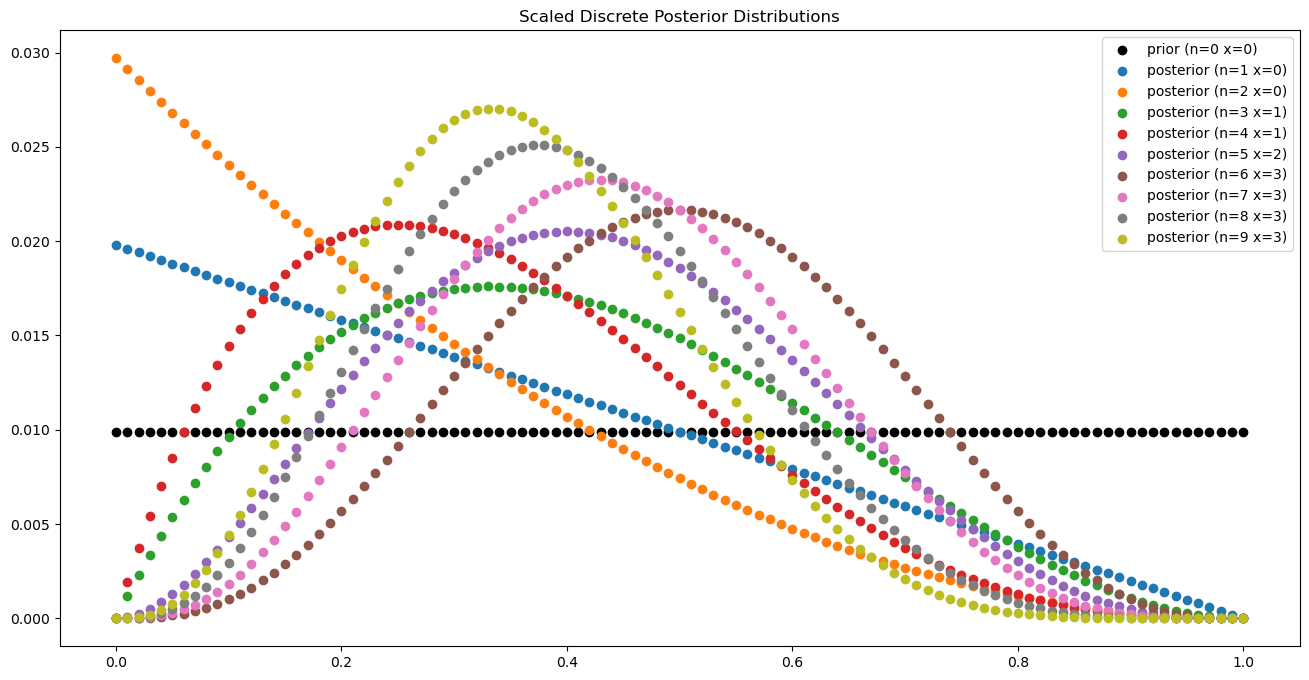

In [2]:
m = 101
pd = np.linspace(0, 1, m)
prior = np.ones(m) / m
obs = 0, 0, 1, 0, 1, 1, 0, 0, 0
n, x = 0, 0

plt.figure(figsize=(16, 8))
plt.scatter(pd, prior, label="prior (n="+str(n)+" x="+str(x)+")", color="k")
plt.title("Scaled Discrete Posterior Distributions")

for i in obs:
    n += 1
    x += i
    posterior = stats.beta(a=x+1, b=n-x+1)
    plt.scatter(pd, posterior.pdf(pd) / m, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend()

### Q2

$\Large
\begin{align}
p(\theta_j|x_j^{(t)},n_j^{(t)})&\propto\theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}\sim Be(x_j^{(t)}+\alpha_j,n_j^{(t)}-x_j^{(t)}+\beta_j)\\
\end{align}$

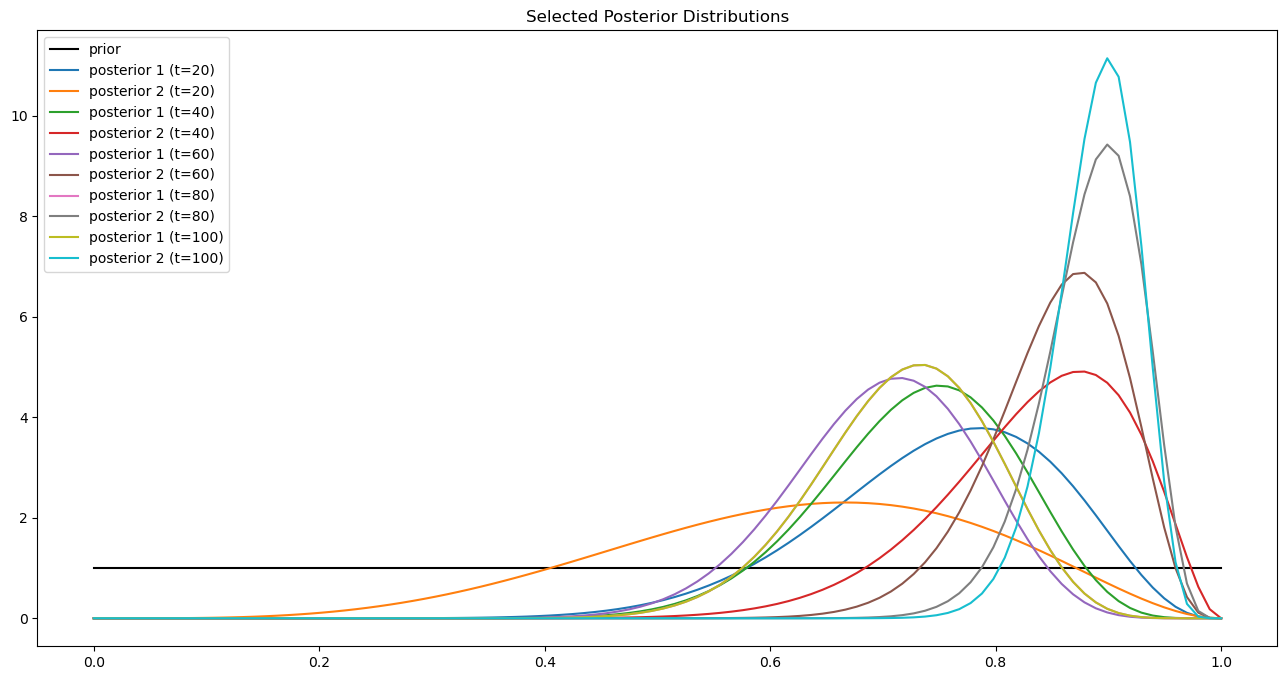

In [3]:
np.random.seed(365)

m = 100
pd = np.linspace(0, 1, m)
alpha, beta = 1, 1
prior = stats.beta(a=alpha, b=beta)
theta1, theta2 = 0.7, 0.9
n1, x1, n2, x2 = 0, 0, 0, 0
posterior1, posterior2 = prior, prior

plt.figure(figsize=(16, 8))
plt.plot(pd, prior.pdf(pd), label="prior", color="k")
plt.title("Selected Posterior Distributions")

for t in range(m):
    p = np.mean(posterior1.rvs(size=100) < posterior2.rvs(size=100))
    coin = stats.bernoulli(p=p).rvs()

    if coin:
        n2 += 1
        x2 += stats.bernoulli(theta2).rvs()
        posterior2 = stats.beta(a=x2+alpha, b=n2-x2+beta)
    else:
        n1 += 1
        x1 += stats.bernoulli(theta1).rvs()
        posterior1 = stats.beta(a=x1+alpha, b=n1-x1+beta)

    if t % 20 == 19:
        plt.plot(pd, posterior1.pdf(pd), label="posterior 1 (t="+str(t+1)+")")
        plt.plot(pd, posterior2.pdf(pd), label="posterior 2 (t="+str(t+1)+")")

plt.legend()

### Q3

The first approach is more appropriate for dynamic data, since it includes the exploration-exploitation trade-off, enabling a good performance now and a better model with new data. However, if there are no new data (static data), the second approach is more appropriate, since it could be done faster than the first approach.

When I apply for jobs, I often send cold emails to current employees for a referral. If I have three templates, and I want to find out which one has the highest reply rate, I could use this approach. It ensures that I have a high reply rate now, as well as a better template as I send those new emails.